In [119]:
# GABRIEL DAVID CHANG PEREZ

# Import de librerias e inicialización del data frame (1. CARGAR DATOS)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

# data set --> Disaster Dataset
url = 'https://raw.githubusercontent.com/gchang110101/Inteligencia-de-Negocios-Clase-Practica-2/main/public_emdat_project.csv?raw=true'

try:
    data_frame = pd.read_csv(url, encoding='unicode_escape')

    # Crear una copia del dataset original para modificar
    data_frame_modificado = data_frame.copy()

    print('Archivo CSV cargado al Data Frame exitosamente')

    print('\nIMPRIMIENDO HEAD DEL DATA SET\n :', data_frame_modificado.head())

except Exception as ex:
    print('ERROR AL CARGAR EL DF --> ', ex)


Archivo CSV cargado al Data Frame exitosamente

IMPRIMIENDO HEAD DEL DATA SET
 :           DisNo. Historic Classification Key Disaster Group Disaster Subgroup  \
0  1999-9388-DJI       No    nat-cli-dro-dro        Natural    Climatological   
1  1999-9388-SDN       No    nat-cli-dro-dro        Natural    Climatological   
2  1999-9388-SOM       No    nat-cli-dro-dro        Natural    Climatological   
3  2000-0001-AGO       No    tec-tra-roa-roa  Technological         Transport   
4  2000-0002-AGO       No    nat-hyd-flo-riv        Natural      Hydrological   

  Disaster Type Disaster Subtype External IDs Event Name  ISO   Country  \
0       Drought          Drought          NaN        NaN  DJI  Djibouti   
1       Drought          Drought          NaN        NaN  SDN     Sudan   
2       Drought          Drought          NaN        NaN  SOM   Somalia   
3          Road             Road          NaN        NaN  AGO    Angola   
4         Flood   Riverine flood          NaN        NaN 

In [121]:
# 2. EXPLORACION INICIAL
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Cantidad de registros:
print('CANTIDAD DE REGISTROS (FILAS) EN EL DATA SET --> ', data_frame_modificado.shape[0])

# Cantidad de columnas:
print('\nCANTIDAD DE COLUMNAS (VARIABLES) EN EL DATA SET --> ', data_frame_modificado.shape[1])

# Descripcion de los datos
print(f'\nIMPRRIMIENDO NÚMERO DE FILAS Y TIPOS DE DATOS:\n')
print(data_frame_modificado.info())

# Clasificación y categorización de las columnas

# Columnas categoricas
columnas_categoricas = [
    "Historic", "Classification Key", "Disaster Group", "Disaster Subgroup", "Disaster Type", "Disaster Subtype",
    "ISO", "Country", "Subregion", "Region", "Location", "Origin", "Associated Types", "OFDA/BHA Response", 
    "Appeal", "Declaration", "Magnitude Scale", "River Basin", "Admin Units"
]

print('\nColumnas categóricas:')
print(columnas_categoricas)

# Columnas de cadena
columnas_de_cadena = [
    "DisNo.", "External IDs", "Event Name", "Entry Date", "Last Update", "Admin Units"
]

print('\nColumas de cadena:')
print(columnas_de_cadena)

# Columnas numericas
columnas_numericas = [
    "AID Contribution ('000 US$)", "Magnitude", "Latitude", "Longitude", "Start Year", "Start Month", "Start Day",
    "End Year", "End Month", "End Day", "Total Deaths", "No. Injured", "No. Affected", "No. Homeless", 
    "Total Affected", "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)", 
    "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)", 
    "Total Damage, Adjusted ('000 US$)", "CPI"
]

print('\nColumnas numericas:')
print(columnas_numericas)

# validar cantidad cadenas
#print(len(columnas_categoricas), ' ', len(columnas_numericas), ' ', len(columnas_de_cadena) )

# COLUMNAS MAS RELEVANTES E IMPORTANTES PARA LOS ANALISIS
# Decidí no incluir columnas que tengan demasiado porcentaje de valores vacíos, porque hay varias columnas
# que tienne hasta 99%
columnas_importantes = [
    "Disaster Group", "Disaster Type", "Country", "Region", "Start Year", "Total Deaths", 
    "No. Affected", "Magnitude Scale", "Appeal"
]

# IMPRIMO EL HEAD DEL CONJUNTO DE DATOS PARA LAS COLUMNAS IMPORTANTES
print('\nHEAD VARIABLES IMPORTANTES:')
print(data_frame_modificado[columnas_importantes].head())


CANTIDAD DE REGISTROS (FILAS) EN EL DATA SET -->  15784

CANTIDAD DE COLUMNAS (VARIABLES) EN EL DATA SET -->  46

IMPRRIMIENDO NÚMERO DE FILAS Y TIPOS DE DATOS:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15784 entries, 0 to 15783
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     15784 non-null  object 
 1   Historic                                   15784 non-null  object 
 2   Classification Key                         15784 non-null  object 
 3   Disaster Group                             15784 non-null  object 
 4   Disaster Subgroup                          15784 non-null  object 
 5   Disaster Type                              15784 non-null  object 
 6   Disaster Subtype                           15784 non-null  object 
 7   External IDs                               2405 non-null   object 
 8   Even

In [122]:
# 3. LIMPIEZA DE DATOS - Identificación Valores

print('IMPRIMIENDO EL PORCENTAJE DE VALORES VACÍOS POR CADA COLUMNA:')

# encontramos el porcentaje de valores nulos por cada columna, y lo redondeamos para mejor formato de lectura
df_porcentajes_vacios = round(data_frame_modificado.isnull().mean() * 100, 2)

print(f'\n{df_porcentajes_vacios}')

# encontramos la suma (cantidad) de valores nulos por cada columna
df_cantidad_vacios = data_frame_modificado.isnull().sum()

print('\nIMPRIMIENDO LA SUMA DE VALORES VACÍOS POR CADA COLUMNA:')
print(f'\n{df_cantidad_vacios}')



IMPRIMIENDO EL PORCENTAJE DE VALORES VACÍOS POR CADA COLUMNA:

DisNo.                                        0.00
Historic                                      0.00
Classification Key                            0.00
Disaster Group                                0.00
Disaster Subgroup                             0.00
Disaster Type                                 0.00
Disaster Subtype                              0.00
External IDs                                 84.76
Event Name                                   68.61
ISO                                           0.00
Country                                       0.00
Subregion                                     0.00
Region                                        0.00
Location                                      4.11
Origin                                       74.94
Associated Types                             79.12
OFDA/BHA Response                             0.00
Appeal                                        0.00
Declaration        

In [123]:
# 3 - LIMPIEZA DE DATOS - IMPUTACION

# valor pre-eliminar, 30%. Decicí tomar en cuenta variables que tengan null percentages por debajo del 30%
# para evitar ser contraproducente con las imputaciones
columnas_nulos_menor_30 = df_porcentajes_vacios[(df_porcentajes_vacios < 30) & (df_porcentajes_vacios > 0)].index.tolist()
print('\nCOLUMNAS CON PORCENTAJES DE VALORES NULOS MENOR AL 30% (', len(columnas_nulos_menor_30), '):')
print(f'\n{columnas_nulos_menor_30}')

# columnas que tienen mas de 80% de null percentage, las borraré, ya que considero que tienne demasiados valores nulos
columnas_nulos_mas_80 = df_porcentajes_vacios[df_porcentajes_vacios > 80].index.tolist()
print('\nCOLUMNAS CON PORCENTAJES DE VALORES NULOS MAYOR AL 80% (', len(columnas_nulos_mas_80), '):')
print(f'\n{columnas_nulos_mas_80}')

# Columnas con las cuales trabajaré imputación
columnas_imputar = [
    "Start Month", "Start Day", "End Month", "End Day", 
    "Total Deaths", "Total Affected", "CPI"
]

print('\nCOLUMNAS A IMPUTAR SEGUN MI ANÁLISIS:\n')
print(columnas_imputar)

# IMPRESIÓN DEL NULL PERCENTAGE DE LAS COLUMNAS QUE VOY A IMPUTAR, BEFORE:
print(f'\nPorcentaje de valores nulos antes de la imputación:\n')
print(round(data_frame_modificado[columnas_imputar].isnull().mean() * 100), 2)

# IMPUTACIONES:
data_frame_start_month_fill = data_frame_modificado['Start Month'].copy()
data_frame_start_month_fill.fillna(data_frame_modificado['Start Month'].median(), inplace=True)

data_frame_start_day_fill = data_frame_modificado['Start Day'].copy()
data_frame_start_day_fill.fillna(data_frame_modificado['Start Day'].median(), inplace=True)

data_frame_end_month_fill = data_frame_modificado['End Month'].copy()
data_frame_end_month_fill.fillna(data_frame_modificado['End Month'].median(), inplace=True)

data_frame_end_day_fill = data_frame_modificado['End Day'].copy()
data_frame_end_day_fill.fillna(data_frame_modificado['End Day'].median(), inplace=True)

data_frame_total_deaths_fill = data_frame_modificado['Total Deaths'].copy()
data_frame_total_deaths_fill.fillna(data_frame_modificado['Total Deaths'].median(), inplace=True)

data_frame_total_affected_fill = data_frame_modificado['Total Affected'].copy()
data_frame_total_affected_fill.fillna(data_frame_modificado['Total Affected'].median(), inplace=True)

data_frame_cpi_fill = data_frame_modificado['CPI'].copy()
data_frame_cpi_fill.fillna(data_frame_modificado['CPI'].mean(), inplace=True)

# REEMPLAZOS DE COLUMNAS DEL DATA_FRAME ORIGINAL, CON LOS SUB DFS TRABAJADOR POR APARTE:
data_frame_modificado['Start Month'] = data_frame_start_month_fill
data_frame_modificado['Start Day'] = data_frame_start_day_fill
data_frame_modificado['End Month'] = data_frame_end_month_fill
data_frame_modificado['End Day'] = data_frame_end_day_fill
data_frame_modificado['Total Deaths'] = data_frame_total_deaths_fill
data_frame_modificado['Total Affected'] = data_frame_total_affected_fill
data_frame_modificado['CPI'] = data_frame_cpi_fill


# IMPRESIÓN DEL NULL PERCENTAGE DE LAS COLUMNAS QUE VOY A IMPUTAR, AFTER:
print(f'\nPorcentaje de valores nulos despues de la imputación:\n')
print(round(data_frame_modificado[columnas_imputar].isnull().mean() * 100), 2)

# DROP DE LAS COLUMNAS QUE TENGAN MAS DE 80% DE NULL PERCENTAGE
data_frame_modificado.drop(columns=columnas_nulos_mas_80, inplace=True)



COLUMNAS CON PORCENTAJES DE VALORES NULOS MENOR AL 30% ( 8 ):

['Location', 'Start Month', 'Start Day', 'End Month', 'End Day', 'Total Deaths', 'Total Affected', 'CPI']

COLUMNAS CON PORCENTAJES DE VALORES NULOS MAYOR AL 80% ( 12 ):

['External IDs', "AID Contribution ('000 US$)", 'Latitude', 'Longitude', 'River Basin', 'No. Homeless', "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)"]

COLUMNAS A IMPUTAR SEGUN MI ANÁLISIS:

['Start Month', 'Start Day', 'End Month', 'End Day', 'Total Deaths', 'Total Affected', 'CPI']

Porcentaje de valores nulos antes de la imputación:

Start Month        0.0
Start Day         10.0
End Month          1.0
End Day            9.0
Total Deaths      20.0
Total Affected    26.0
CPI                1.0
dtype: float64 2

Porcentaje de valores nulos despues de la imputación:

Start Month       0.0
Start

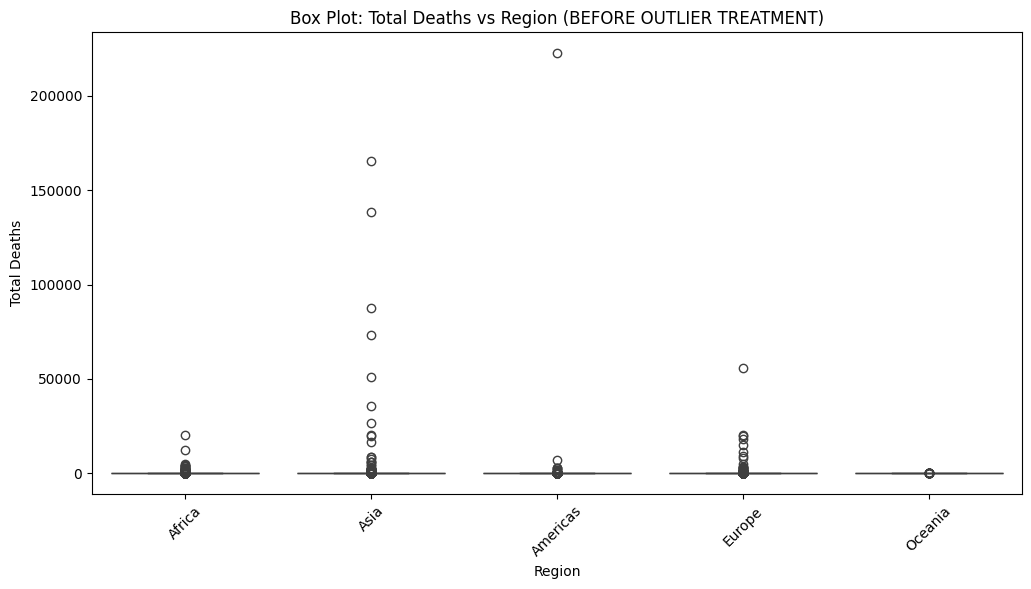

In [124]:
# 4 MANEJO DE OUTLIERS - GRAFICOS BEFORE

# Box Plot: Total Deaths vs Region
plt.figure(figsize=(12, 6))
sea.boxplot(x=data_frame_modificado['Region'], y=data_frame_modificado['Total Deaths'])
plt.title('Box Plot: Total Deaths vs Region (BEFORE OUTLIER TREATMENT)')
plt.xlabel('Region')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()

In [125]:

# 4 - MANEJO DE OUTLIERS - TREATMENT EN SÍ

# ELIMINAR LOS REGISTROS QUE SEAN DE MUERTES TOTALES DE UN DESASTRE NATURAL ENCIMA DE LOS 20K
data_frame_modificado.loc[data_frame_modificado['Total Deaths'] > 20000, 'Total Deaths'] = np.nan




C:\Users\Yamila Karim Conrado\AppData\Local\Temp\ipykernel_19712\498566120.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.boxplot(x=data_frame_modificado['Region'], y=data_frame_modificado['Total Deaths'], palette="Set3")


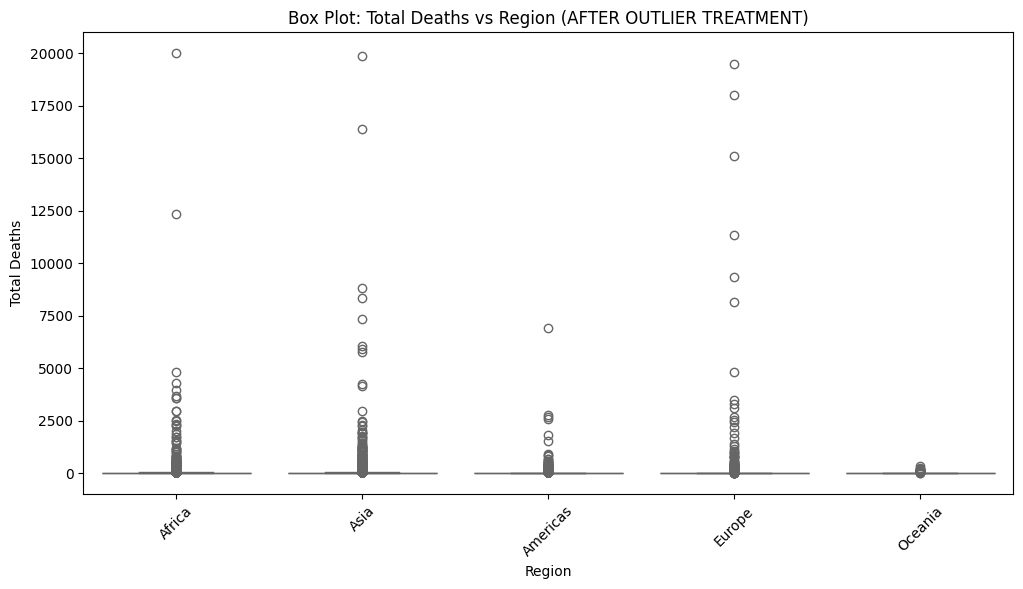

In [126]:
# 4 MANEJO DE OUTLIERS - GRAFICOS AFTER

# Box Plot: Total Deaths vs Region
plt.figure(figsize=(12, 6))
sea.boxplot(x=data_frame_modificado['Region'], y=data_frame_modificado['Total Deaths'], palette="Set3")
plt.title('Box Plot: Total Deaths vs Region (AFTER OUTLIER TREATMENT)')
plt.xlabel('Region')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()

In [127]:
# 5  - transformacion de variables 

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Usare las variables total affected, y magnitude, como dos de las numericas mas relevantes
variables_numericas = ['Total Affected', 'Magnitude']

# Aplicar estandarización (Z-score) y normalización (Min-Max Scaling) a cada una
scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# z-core y min-max scaling de 'Total Affected'
data_frame_modificado['Total_Affected_scaled'] = scaler.fit_transform(data_frame_modificado[['Total Affected']])
data_frame_modificado['Total_Affected_normalized'] = min_max_scaler.fit_transform(data_frame_modificado[['Total Affected']])

# z-core y min-max scaling de 'Magnitude'
data_frame_modificado['Magnitude_scaled'] = scaler.fit_transform(data_frame_modificado[['Magnitude']])
data_frame_modificado['Magnitude_normalized'] = min_max_scaler.fit_transform(data_frame_modificado[['Magnitude']])

# IMPRIMIMOS UN PAR DE SAMPLES DE AMBAS COLUMNAS, TOTAL AFFECTED Y MAGNITUDE, JUNTO A VALORES
# CALCULADOR EN LA NORMALIZACIÓN Y LA ESTANDARIZACIÓN
print(data_frame_modificado[['Total Affected', 'Total_Affected_scaled', 'Total_Affected_normalized']].sample(5))
print(f'\n{data_frame_modificado[['Magnitude', 'Magnitude_scaled', 'Magnitude_normalized']].sample(5)}')

      Total Affected  Total_Affected_scaled  Total_Affected_normalized
618            957.0              -0.063592               2.896970e-06
7694           957.0              -0.063592               2.896970e-06
1575           600.0              -0.063670               1.815152e-06
2532            66.0              -0.063786               1.969697e-07
8075           957.0              -0.063592               2.896970e-06

       Magnitude  Magnitude_scaled  Magnitude_normalized
9387         NaN               NaN                   NaN
8542         NaN               NaN                   NaN
11273        NaN               NaN                   NaN
6532         NaN               NaN                   NaN
6459         NaN               NaN                   NaN


In [128]:
# 6 - Ingeniería de características

from sklearn.preprocessing import LabelEncoder

# PARA MI PRIMERA COLUMNA AGREGADA O NUEVA, QUIERO CREAR UNA COLUMNA QUE SEA LA PROPORCION DE 
# MUERTES TOTALES, EN BASE AL TOTAL DE AFECTADOS EN SÍ
data_frame_modificado['Affected Death Proportion'] = data_frame_modificado['Total Deaths'] / data_frame_modificado['Total Affected']
data_frame_modificado['Affected Death Proportion'] = data_frame_modificado['Affected Death Proportion'].fillna(0) 

# PARA MI SEGUNDA COLUMNA AGREGADA, VOY A HACER UNA BASADA EN CATEGORÍAS SEGÚN QUARTILES PAR ALA MAGNITUD
data_frame_modificado['Magnitude Range'] = pd.qcut(data_frame_modificado['Magnitude'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Aplicar Label Encoding a la columna Magnitude_Range
label_encoder = LabelEncoder()
data_frame_modificado['Magnitude Range Encoded'] = label_encoder.fit_transform(data_frame_modificado['Magnitude Range'])

print(data_frame_modificado[['Total Deaths', 'Total Affected', 'Affected Death Proportion']].sample(5))
print(f'\n{data_frame_modificado[['Magnitude', 'Magnitude Range', 'Magnitude Range Encoded']].sample(5)}')

      Total Deaths  Total Affected  Affected Death Proportion
4703          16.0           957.0                   0.016719
5432          30.0            20.0                   1.500000
8719          14.0         81473.0                   0.000172
3183          15.0          1000.0                   0.015000
1369          12.0           143.0                   0.083916

       Magnitude Magnitude Range  Magnitude Range Encoded
12284       2.60             Low                        1
12953   85984.41       Very High                        3
6741         NaN             NaN                        4
4777         NaN             NaN                        4
5728   518000.00       Very High                        3


In [132]:
# 7 - Análisis Comparativo

# En este análisis comparativo, pude notar las diferencias entre el DataFrame original y el modificado. 
# Se realizaron diversas imputaciones de valores nulos, se crearon nuevas columnas, 
# y se aplicaron transformaciones sobre algunas variables numéricas para mejoras la calidad
# del conjunto de datos, y de los análisis diersos.
# Borré varias columnas del original que decidí no tomar en cuenta, pero en cambio, creé nuevas en el modificado
# Logré suavizar un poco los valores exagerados respecto a los registros de Desastres con cantidades 
# exageradas de muertes; identificados como outliers

print('Data Frame Original - Antes del Procesamiento:')
print(f'\nCantidad de filas y columnas (Original): {data_frame.shape}\n')
print(data_frame.describe())
print('\n')
print(round(data_frame.isnull().mean() * 100, 2))

print('\nData Frame Modificado - Después de Procesamiento')
print(f'\nCantidad de filas y columnas (Procesado): {data_frame_modificado.shape}\n')
print(data_frame_modificado.describe())
print('\n')
print(round(data_frame_modificado.isnull().mean() * 100, 2))

Data Frame Original - Antes del Procesamiento:

Cantidad de filas y columnas (Original): (15784, 46)

       AID Contribution ('000 US$)     Magnitude     Latitude    Longitude  \
count                 4.900000e+02  3.378000e+03  1815.000000  1815.000000   
mean                  2.851070e+04  6.006125e+04    16.464334    42.139949   
std                   2.116816e+05  7.412252e+05    21.776287    75.535413   
min                   3.000000e+00 -5.700000e+01   -72.640000  -172.095000   
25%                   1.660000e+02  7.600000e+00     1.102500     0.859500   
50%                   7.665000e+02  1.900000e+02    18.590000    54.448200   
75%                   4.951000e+03  2.049750e+04    34.816500   103.099000   
max                   3.518530e+06  4.000000e+07    67.930000   179.650000   

         Start Year   Start Month     Start Day      End Year     End Month  \
count  15784.000000  15715.000000  14275.000000  15784.000000  15622.000000   
mean    2010.590155      6.448616    